In [1]:
import sys
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
csv_file = "example_data.csv"
row_to_plot = 5

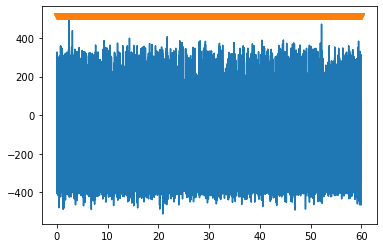

In [100]:
with open(csv_file, 'r') as f:
    original_data = f.read().split('\n')[1:]
    original_data = original_data[row_to_plot].split(',')
    spike_positions = [int(x) for x in original_data[1].split(';')]
    samples = [int(x) for x in original_data[0].split(';')]

    
# print(samples[:100])
# print(spike_positions[:100])
# To plot the spikes, generate an array of NaNs (which do not get plotted)
spikes = [math.nan] * len(samples)

# Plot spike indicators above all samples.
spike_y = max(samples) + 1

# Replace the values in the positions of the spikes with the maximum sample value
for s in spike_positions:
    spikes[s] = spike_y

# Generate the time vector (fs=20kHz)
t = [x/20000 for x in range(len(samples))]

plt.plot(t, samples)
plt.plot(t, spikes, 'v')
plt.show()

In [101]:
samples

[73,
 73,
 63,
 61,
 59,
 59,
 55,
 47,
 34,
 23,
 12,
 6,
 1,
 0,
 0,
 2,
 3,
 5,
 6,
 9,
 14,
 19,
 22,
 23,
 20,
 16,
 11,
 4,
 -4,
 -11,
 -17,
 -22,
 -25,
 -26,
 -25,
 -27,
 -31,
 -35,
 -39,
 -43,
 -45,
 -40,
 -31,
 -25,
 -25,
 -32,
 -41,
 -50,
 -59,
 -68,
 -75,
 -80,
 -84,
 -90,
 -94,
 -98,
 -105,
 -107,
 -100,
 -89,
 -84,
 -81,
 -76,
 -72,
 -72,
 -72,
 -71,
 -69,
 -71,
 -73,
 -72,
 -70,
 -68,
 -64,
 -58,
 -50,
 -43,
 -41,
 -45,
 -54,
 -68,
 -84,
 -98,
 -111,
 -120,
 -126,
 -128,
 -126,
 -122,
 -119,
 -116,
 -114,
 -113,
 -115,
 -120,
 -126,
 -134,
 -142,
 -146,
 -145,
 -142,
 -137,
 -130,
 -119,
 -111,
 -109,
 -107,
 -104,
 -104,
 -108,
 -114,
 -116,
 -121,
 -132,
 -147,
 -156,
 -159,
 -158,
 -155,
 -148,
 -137,
 -129,
 -128,
 -133,
 -141,
 -149,
 -157,
 -162,
 -163,
 -156,
 -144,
 -132,
 -122,
 -111,
 -98,
 -91,
 -93,
 -100,
 -105,
 -105,
 -106,
 -108,
 -111,
 -114,
 -118,
 -123,
 -129,
 -138,
 -152,
 -163,
 -172,
 -182,
 -191,
 -192,
 -187,
 -180,
 -172,
 -165,
 -162,
 -165,
 -

In [104]:
with open(r'demo.dat', 'w') as fp:
    for item in samples:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


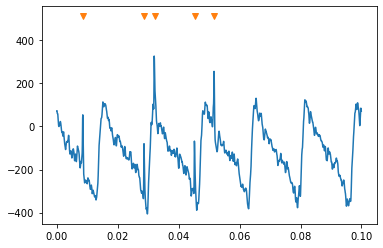

In [105]:
plt.plot(t[:2000], samples[:2000])
plt.plot(t[:2000], spikes[:2000], 'v')
plt.show()

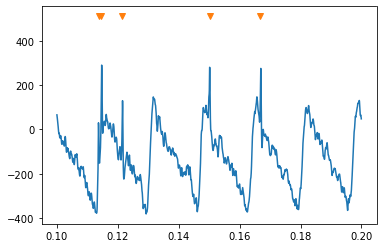

In [102]:
plt.plot(t[2000:4000], samples[2000:4000])
plt.plot(t[2000:4000], spikes[2000:4000], 'v')
plt.show()

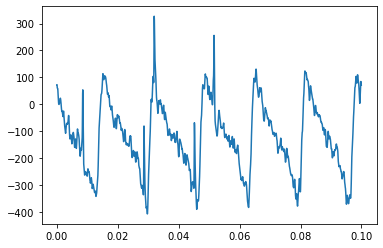

In [75]:
plt.plot(t[:2000], samples[:2000])

In [29]:
from scipy.signal import butter, sosfiltfilt, filtfilt
from scipy.fft import fft, fftfreq

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b = butter(order, [low, high], btype='band', output='sos')
    return b

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b= butter_bandpass(lowcut, highcut, fs, order=order)
    plt.plot(b)
    plt.show()
    y = sosfiltfilt(b, data)
    return y

def butter_lowpass(freq, fs, order=5):
    nyq = 0.5 * fs
    freq = freq / nyq
    b = butter(order, freq, btype='low', output='sos')
    return b

def butter_lowpass_filter(data, freq, fs, order=5):
    b= butter_lowpass(freq, fs, order=order)
    plt.plot(b)
    plt.show()
    y = sosfiltfilt(b, data)
    return y

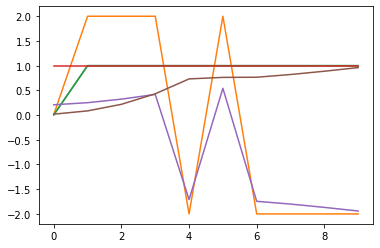

In [95]:
filtered = butter_bandpass_filter(samples, 450, 6000, 20000, order=10)

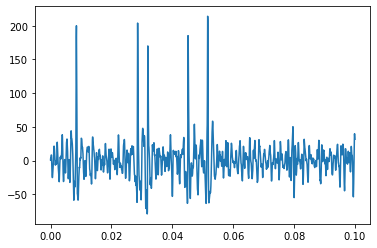

In [106]:
plt.plot(t[:2000], filtered[:2000])

In [32]:
def butter_lowpass_filter2(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [33]:
filte = butter_lowpass_filter2(samples, 100, 20000, 2)

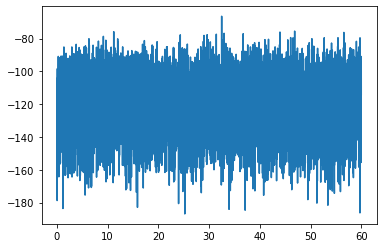

In [34]:
plt.plot(t, filte)

In [35]:
filte

array([-148.81110359, -148.0525262 , -147.30083795, ..., -113.93176358,
       -113.95208878, -113.9686713 ])

In [36]:
samples

[-137,
 -130,
 -115,
 -105,
 -94,
 -79,
 -65,
 -63,
 -73,
 -85,
 -93,
 -99,
 -102,
 -100,
 -92,
 -84,
 -77,
 -73,
 -71,
 -74,
 -78,
 -83,
 -91,
 -100,
 -109,
 -119,
 -129,
 -132,
 -127,
 -121,
 -119,
 -119,
 -116,
 -111,
 -109,
 -108,
 -110,
 -110,
 -109,
 -110,
 -114,
 -120,
 -123,
 -126,
 -132,
 -142,
 -152,
 -161,
 -168,
 -175,
 -180,
 -182,
 -181,
 -179,
 -174,
 -167,
 -159,
 -151,
 -143,
 -134,
 -128,
 -127,
 -132,
 -134,
 -130,
 -123,
 -116,
 -109,
 -103,
 -100,
 -103,
 -111,
 -118,
 -119,
 -116,
 -116,
 -119,
 -126,
 -139,
 -151,
 -155,
 -155,
 -154,
 -147,
 -130,
 -115,
 -113,
 -112,
 -104,
 -98,
 -101,
 -104,
 -95,
 -81,
 -74,
 -73,
 -71,
 -68,
 -71,
 -79,
 -88,
 -97,
 -106,
 -111,
 -114,
 -118,
 -125,
 -131,
 -134,
 -137,
 -140,
 -143,
 -145,
 -145,
 -145,
 -147,
 -149,
 -148,
 -140,
 -130,
 -123,
 -123,
 -126,
 -129,
 -133,
 -136,
 -138,
 -137,
 -135,
 -133,
 -129,
 -129,
 -133,
 -134,
 -128,
 -121,
 -119,
 -119,
 -117,
 -116,
 -120,
 -123,
 -122,
 -117,
 -110,
 -108,
 -114,

In [82]:
from scipy.fft import rfft, rfftfreq
import numpy as np

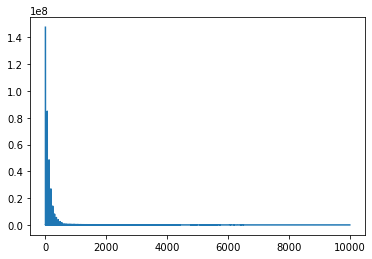

In [83]:
yf = rfft(samples)
xf = rfftfreq(len(samples), 1 / 20000)

plt.plot(xf, np.abs(yf))
plt.show()

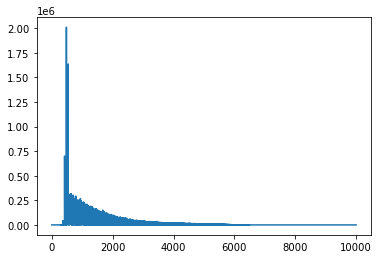

In [97]:
yf = rfft(filtered)
xf = rfftfreq(len(filtered), 1 / 20000)

plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
a = [0,0,0,1,1,1,1,1,0,0,0]